In [7]:
!pip install torch torchvision torchaudio matplotlib numpy tqdm

In [8]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

import os
import json
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import transforms
from torchvision.transforms import v2

In [9]:
for path_dir, dir_list, file_list in os.walk('./mnist/training'): # os.walk is GENERATOR func
            print(f'[os => walk]: {path_dir} | {len(dir_list)} | {len(file_list)}')

[os => walk]: ./mnist/training | 10 | 0
[os => walk]: ./mnist/training/class_4 | 0 | 5842
[os => walk]: ./mnist/training/class_3 | 0 | 6131
[os => walk]: ./mnist/training/class_2 | 0 | 5958
[os => walk]: ./mnist/training/class_5 | 0 | 5421
[os => walk]: ./mnist/training/class_9 | 0 | 5949
[os => walk]: ./mnist/training/class_0 | 0 | 5923
[os => walk]: ./mnist/training/class_7 | 0 | 6265
[os => walk]: ./mnist/training/class_6 | 0 | 5918
[os => walk]: ./mnist/training/class_1 | 0 | 6742
[os => walk]: ./mnist/training/class_8 | 0 | 5851


In [12]:
class MNISTDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        
        self.len_dataset = 0
        self.data_list = []
        
        for path_dir, dir_list, file_list in os.walk(path): # os.walk is GENERATOR func
            # print(f'[WALK]: {path_dir} | {dir_list} | {len(file_list)}')
            
            if path_dir == path:
                self.classes = sorted(os.listdir(path_dir))
                self.class_to_index = { cls_name: i for i, cls_name in enumerate(self.classes) }
                continue
            
            cls = path_dir.split(os.sep)[-1]

            for file_name in file_list:
                file_path = os.path.join(path_dir, file_name)
                self.data_list.append((file_path, self.class_to_index[cls]))
                
            self.len_dataset += len(file_list)

    def __len__(self):
        return self.len_dataset
    
    def __getitem__(self, index):
        file_path, target = self.data_list[index]
        sample = Image.open(file_path)
        
        # print(f'[PIL => Sample]: {sample}')
        
        if self.transform is not None:
            sample = self.transform(sample)
            
        return sample, target

In [13]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

transform_v2 = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5, ), std=(0.5, ))
])

train_dataset = MNISTDataset(path='./mnist/training', transform=transform_v2)
test_dataset = MNISTDataset(path='./mnist/testing', transform=transform_v2)

In [14]:
img, cls = train_dataset[9000]

print(f'''
        img: 
            {type(img)}
            {img.shape}
            {img.dtype}
            min = {img.min()}, max = {img.max()}
         
        cls:
            {cls}
''')


        img: 
            <class 'torchvision.tv_tensors._image.Image'>
            torch.Size([1, 28, 28])
            torch.float32
            min = -1.0, max = 1.0
         
        cls:
            3



In [15]:
print(f'[Train dataset length]: {len(train_dataset)}')
print(f'[Test dataset length]: {len(test_dataset)}')

[Train dataset length]: 60000
[Test dataset length]: 10000


In [16]:
print(train_dataset.classes)
# print(train_dataset.class_to_index.items())

for cls, one_hot_vec_position in train_dataset.class_to_index.items():
    # print(cls, one_hot_vec_position)
    one_hot_vector = [(i == one_hot_vec_position)*1 for i in range(10)]
    print(f'\033[32m{cls}\033[0m => \033[34m{one_hot_vector}\033[0m')

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']
class_0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
class_1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
class_2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
class_3 => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
class_4 => [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
class_5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
class_6 => [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
class_7 => [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
class_8 => [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
class_9 => [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


class_3


TypeError: Invalid shape (1, 28, 28) for image data

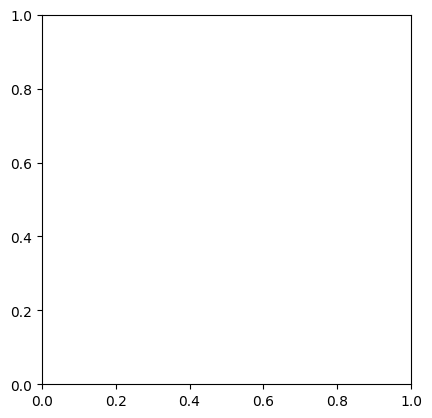

In [9]:
img, one_hot_vec_position = train_dataset[9000]
cls = train_dataset.classes[one_hot_vec_position]
print(f'\033[32m{cls}\033[0m')
plt.imshow(img, cmap='Greys')

In [10]:
train_dataset_split, val_dataset = random_split(train_dataset, [0.8, 0.2])
print(f'[Train]: {len(train_dataset_split)}')
print(f'[Validation]: { len(val_dataset)}')
print(f'[Test]: {len(test_dataset)}')

[Train]: 48000
[Validation]: 12000
[Test]: 10000


In [11]:
train_loader = DataLoader(train_dataset_split, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# for i, (samples, target) in enumerate(train_loader):
#     if i < 3:  
#         print(f''' 
#             Batch number: {i + 1}
#                     img: {type(samples)}
#                     Samples shape: {samples.shape}
#                     Target shape: {target.shape}
#         ''')
# 
# print(f'\033[32m  .........................  \033[0m')
# 
# print(f''' 
#             Batch number: {i + 1}
#                     img: {type(samples)}
#                     Samples shape: {samples.shape}
#                     Target shape: {target.shape}
#         ''')

count1 = 0

for x, targets in train_loader:
    if count1 >= 2:
        break
    else:
        print(f'[Train loader samples]: {x}')
        print(f'[Train loader targets]: {targets}')
        print(f'[Train loader targets reshape]: {targets.reshape(-1).to(torch.int32)}')
        print(f'[Train loader targets eye]: {torch.eye(10)[targets.reshape(-1).to(torch.int32)]}')
        
        count1 += 1
    
count2 = 0   
for i in enumerate(train_loader):
    if count2 >= 2:
        break
    else:
        print(f'[Enumerate train loader]: {i}')
        count2 += 1

[Train loader samples]: tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -0.9451, -0.9373,  ..., -1.0000, -1.0000, -1.0000],
  

IndexError: index 10 is out of bounds for dimension 0 with size 10